<a href="https://colab.research.google.com/github/tanakou64/som-edu/blob/main/SOM%E6%B4%BB%E7%94%A8%E4%BE%8B_20250711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOMを活用した大学講義アンケートのテキストマイニング分析
分析対象：30件のアンケート回答

1. SOMクラスター分析実行中...

【SOM（自己組織化マップ）分析について】
SOMは高次元データを2次元平面上に投影し、類似したデータを近接配置する手法です。
距離マップでは、濃い色ほど異なる特徴を持つ領域を示し、明るい色は類似領域を表します。
学生の回答パターンが視覚的に把握でき、教育効果の多様性を理解できます。
--------------------------------------------------


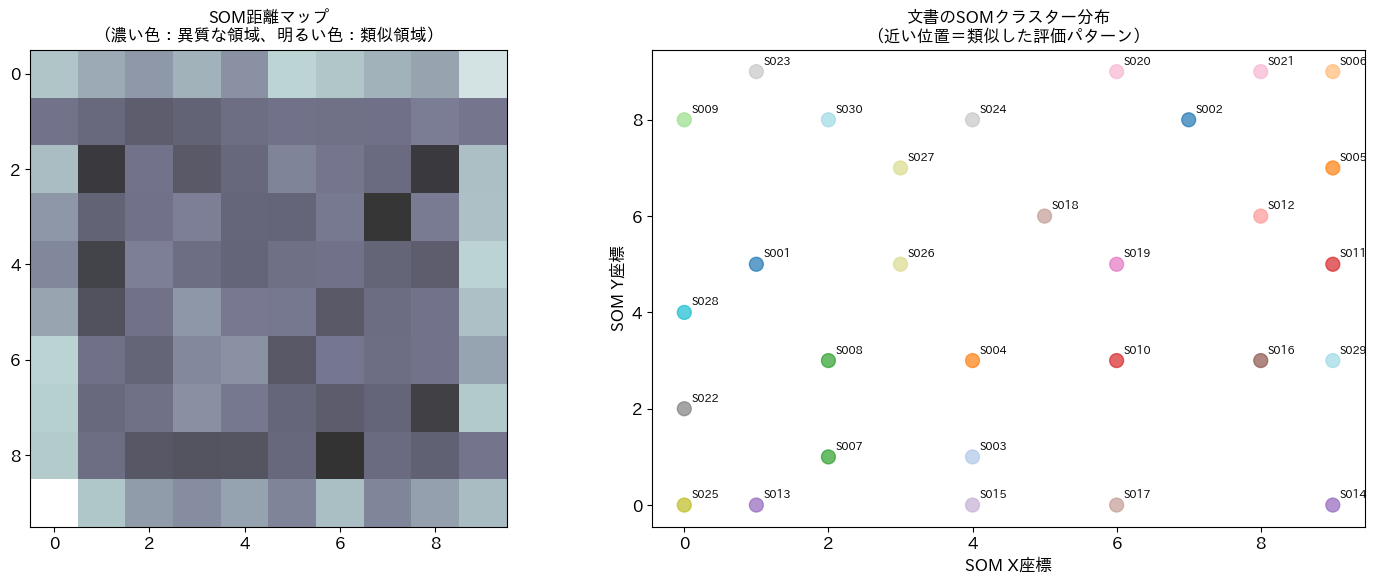


【学生識別IDの関係性解釈】
・近接配置された学生ID（例：S001, S005）は類似した学習体験・評価観点を持つ
・離れて配置された学生IDは異なる学習ニーズや課題認識を示す
・同一領域の学生には共通のサポートや指導法が効果的
・散らばった配置は学習者の多様性を示し、個別対応の必要性を示唆

2. 階層クラスタリング分析実行中...

【階層クラスタリング分析について】
階層クラスタリングは学生の回答を段階的にグループ化し、類似性の構造を樹形図で表現します。
デンドログラムの縦軸は類似度の距離を示し、低い位置で結合するほど類似度が高いことを意味します。
教育においては、学習者グループの自然な分類と、個別指導の対象特定に活用できます。
--------------------------------------------------


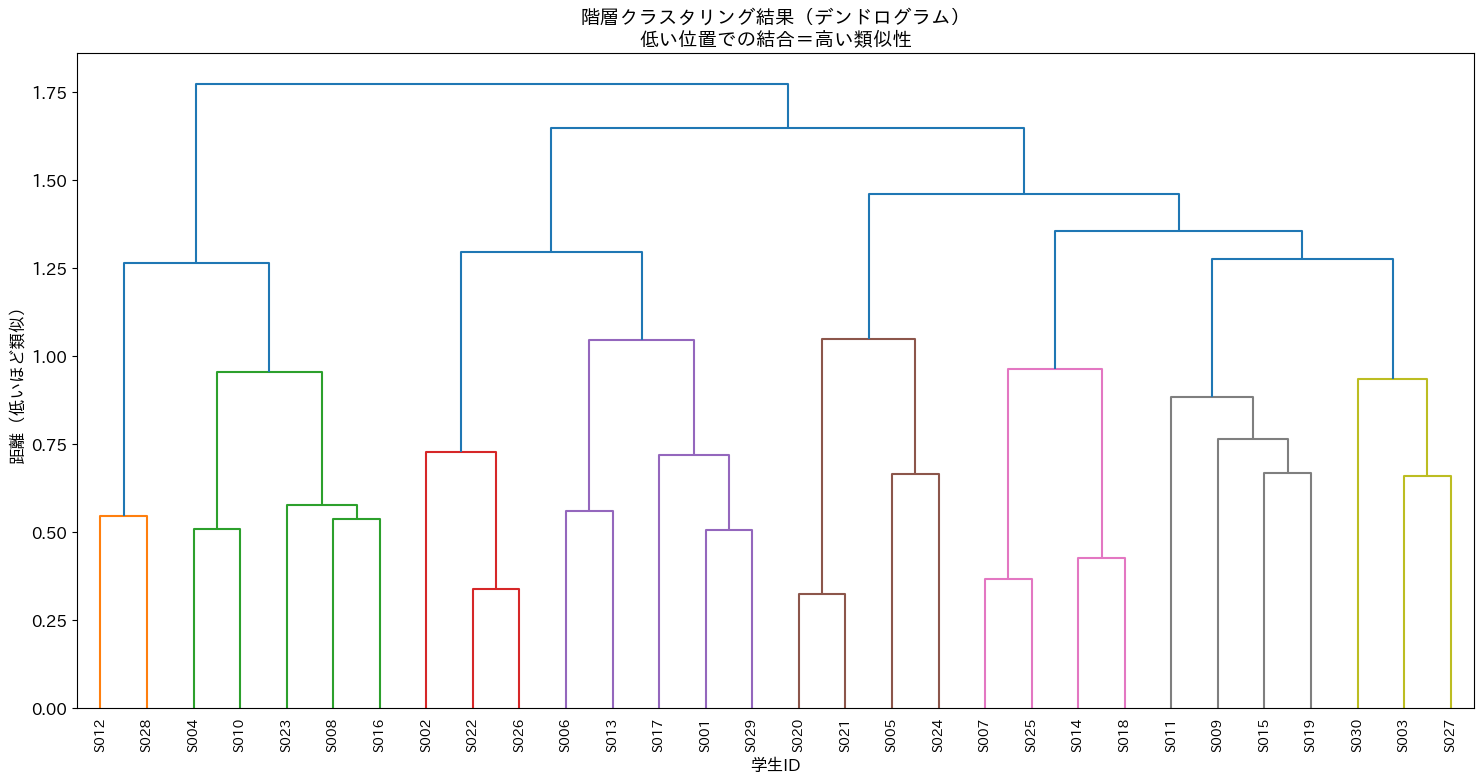


【階層クラスタリング結果の解釈】
・樹の枝の高さ：学生間の評価内容の相違度を表す
・低い位置で結合：類似した学習体験や評価観点を持つ学生ペア
・高い位置で結合：大きく異なる評価パターンを持つグループ
・大きなクラスター：授業の主要な評価傾向を反映
・小さなクラスター：特異な評価観点や個別ニーズを示唆

3. 頻出度分析実行中...

【頻出語ランキング分析について】
頻出語分析は学生の回答で最も多く言及されたキーワードを特定します。
出現頻度の高い語彙は、学生が重視する学習要素や共通の関心事項を示します。
教育改善において、学生の主要な評価観点と改善要求を把握する基礎資料となります。
--------------------------------------------------


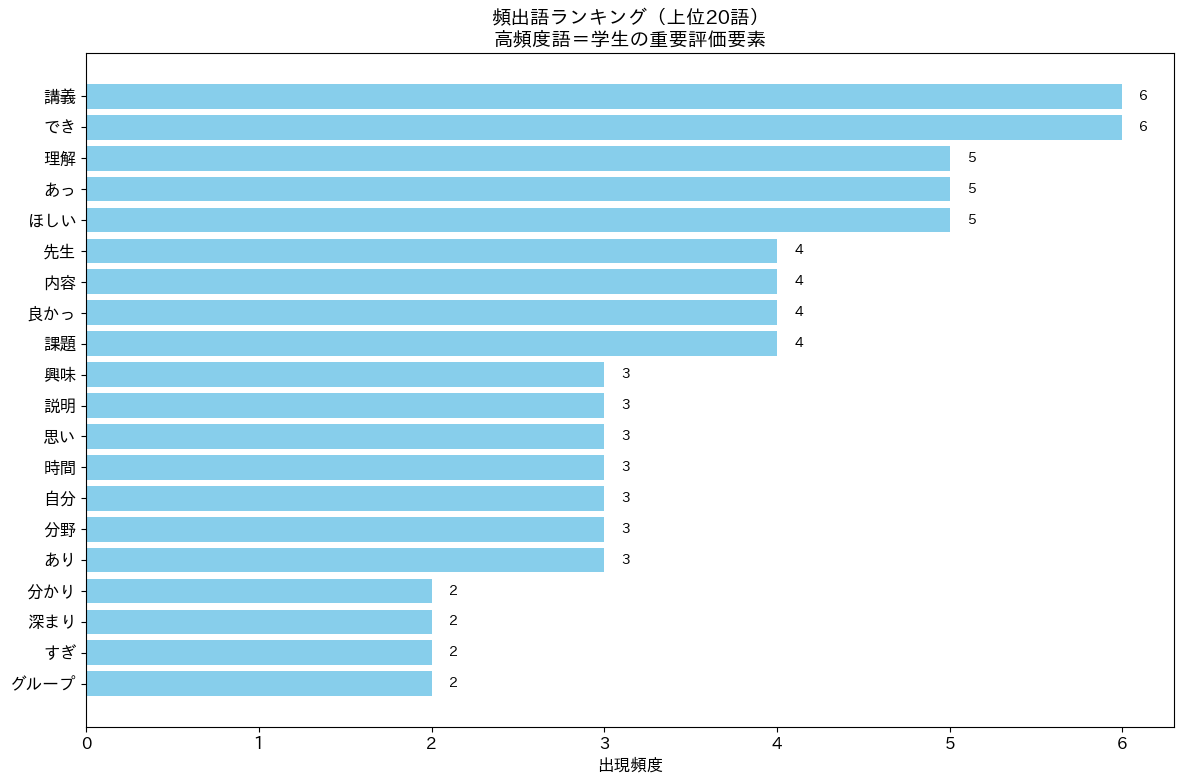


【頻出語ランキングの解釈指針】
・上位語：学生の共通関心事項、授業の核心的評価要素
・教育関連語の多さ：授業の基本要素への注目度
・感情語の出現：学習体験の感情的側面の重要性
・課題関連語：学生の負担感や学習課題への意識
・肯定語 vs 否定語：全体的な満足度傾向の把握

4. 共起分析実行中...

【共起ネットワーク分析について】
共起分析は文章内で同時に出現する単語ペアの関係性を可視化します。
ネットワーク図では、線で結ばれた単語同士が関連して言及される傾向を示します。
教育分析では、学習要素間の相互関係や学生の認知的結びつきを理解できます。
--------------------------------------------------


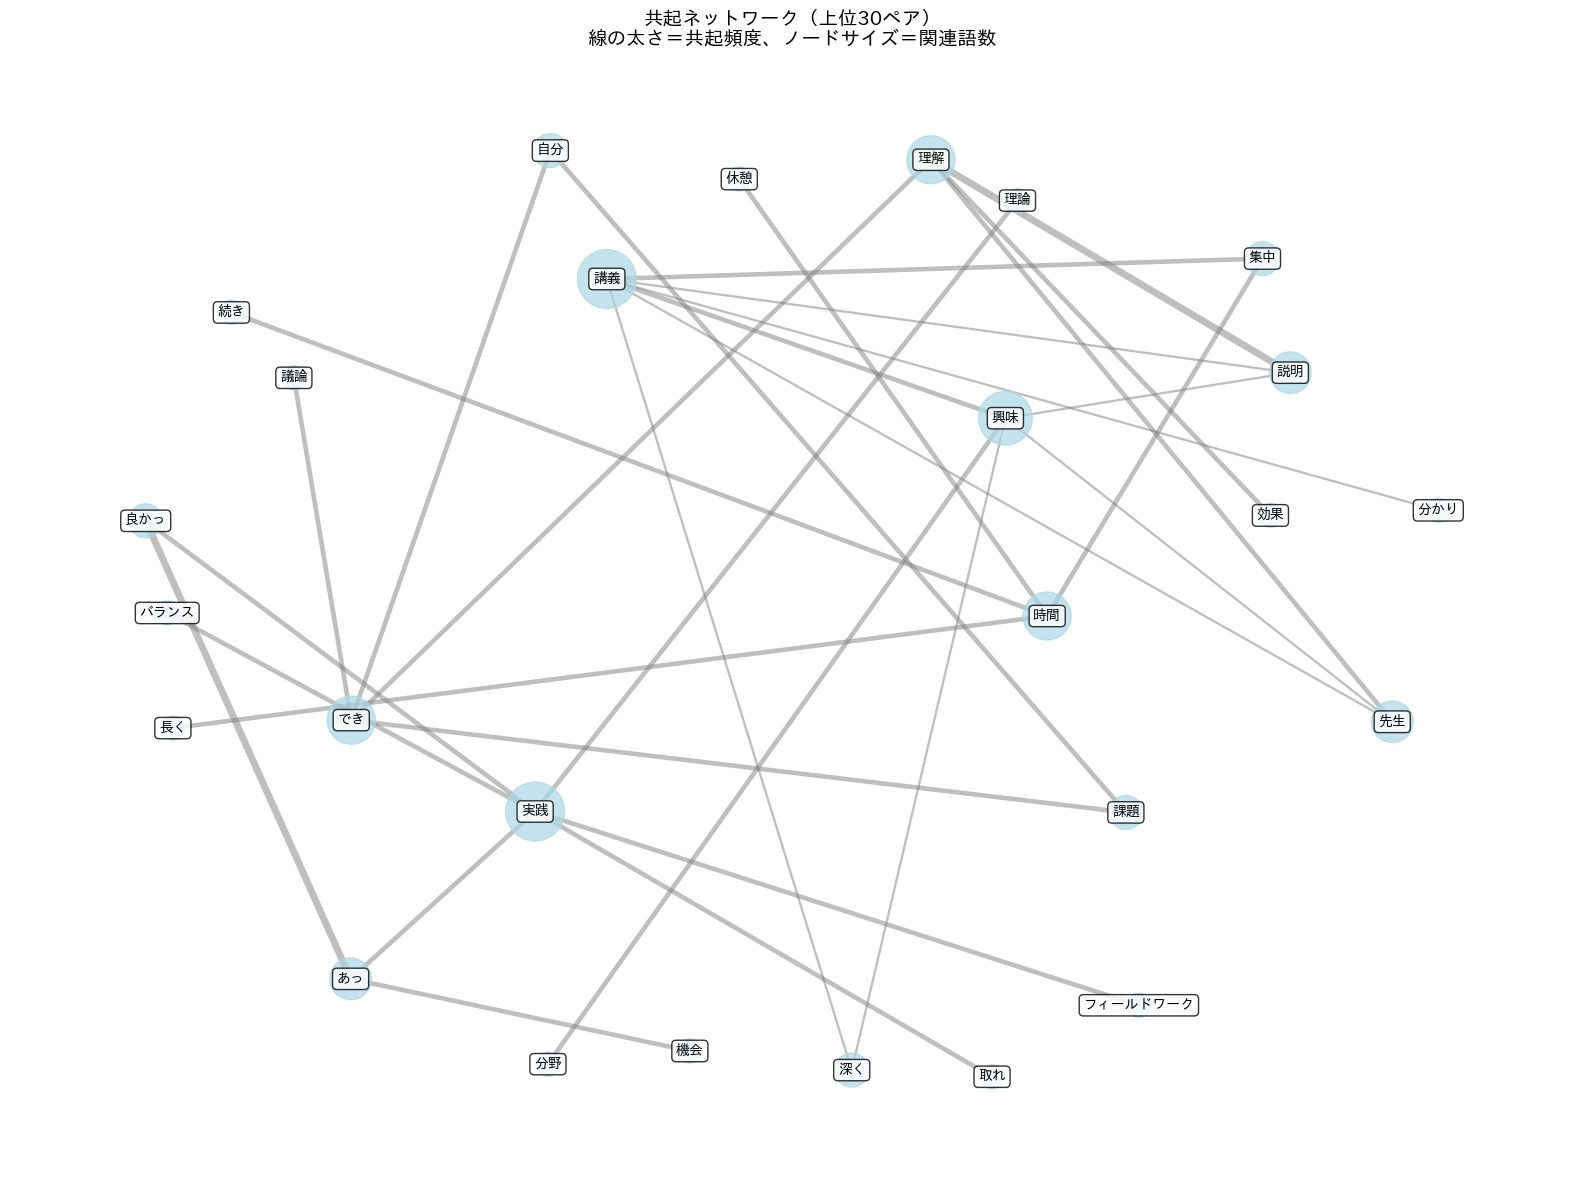


【共起ネットワークの解釈指針】
・太い線：強い関連性を持つ概念ペア（例：「先生」-「説明」）
・大きなノード：多くの概念と関連する中心的キーワード
・密集したクラスター：関連する概念群（例：授業方法、評価関連）
・孤立したノード：独立した評価要素や特殊な関心事項
・ネットワーク全体の構造：学生の認知的概念マップを反映

【共起ペア詳細】
----------------------------------------
 1. 「理解」-「説明」: 6回
 2. 「あっ」-「良かっ」: 6回
 3. 「興味」-「講義」: 4回
 4. 「先生」-「理解」: 4回
 5. 「でき」-「議論」: 4回
 6. 「あっ」-「機会」: 4回
 7. 「フィールドワーク」-「実践」: 4回
 8. 「あっ」-「実践」: 4回
 9. 「実践」-「良かっ」: 4回
10. 「実践」-「理論」: 4回

5. 分析結果の解釈...
【大学講義アンケートのテキストマイニング結果の解釈】

1. 全体的な傾向
----------------------------------------
・分析対象：30件の学生アンケート
・最頻出語：「講義」（6回出現）
・SOMクラスター数：30個のクラスターを検出

2. 頻出語分析からの知見
----------------------------------------
・「理解」「説明」の出現：学習内容の理解度が重要な評価要素

3. 共起分析からの知見
----------------------------------------
・主要な共起ペア：「理解」-「説明」, 「あっ」-「良かっ」, 「興味」-「講義」

4. SOMクラスター分析からの知見
----------------------------------------
・クラスター分布：30個のクラスターに分類
・多様なクラスター：学生の評価観点が多岐にわたる

5. 階層クラスタリング（ツリー構造）からの知見
----------------------------------------
・デンドログラムにより、学生の回答パターンの類似性が階層的に表示
・距離が近い学生同士は類似した評価観点を持つ傾向
・大きなクラスターは共通の学習体験を示す
・小さなクラスターは

In [25]:
# SOMを活用した大学講義アンケートのテキストマイニング
# Google Colab用コード

# 必要なライブラリのインストール
!pip install minisom mecab-python3 unidic-lite networkx japanize-matplotlib
!pip install scikit-learn pandas numpy matplotlib seaborn scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import MeCab
from collections import Counter, defaultdict
import networkx as nx
import itertools
from minisom import MiniSom
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

# 日本語フォント設定
japanize_matplotlib.japanize()
plt.rcParams['font.size'] = 12

# 1. サンプルデータの生成：大学講義アンケート（30人分）
def generate_lecture_survey_data():
    """大学講義を受けた学生のアンケート記述内容を生成"""
    survey_responses = [
        "この講義は非常に興味深く、先生の説明がとても分かりやすかったです。特に具体例が豊富で理解が深まりました。",
        "内容が難しすぎて理解するのに苦労しました。もう少し基礎から説明してほしかったです。",
        "グループワークが多くて楽しかったです。他の学生との議論を通じて新しい視点を得ることができました。",
        "プレゼンテーションの機会があったのが良かったです。発表スキルも向上したと思います。",
        "教材が古くて現代的な内容が少なかったです。もっと最新の事例を取り入れてほしいです。",
        "先生が親身になって質問に答えてくれました。オフィスアワーも活用しやすかったです。",
        "課題が多すぎて他の授業との両立が大変でした。量を調整してほしいです。",
        "実習やフィールドワークがあって実践的で良かったです。理論と実践のバランスが取れていました。",
        "講義のペースが早くてついていくのが大変でした。もう少しゆっくり進めてほしいです。",
        "ディスカッションの時間が十分にあって、自分の意見を述べる機会が多かったです。",
        "試験の難易度が適切で、講義内容をしっかり反映していました。公平な評価だと思います。",
        "オンライン配信もあって復習しやすかったです。欠席した時も安心でした。",
        "先生の研究分野への情熱が伝わってきて、モチベーションが上がりました。",
        "レポート課題が多様で創造性を発揮できました。自分なりに考える力がついたと思います。",
        "講義室の環境が良くて集中しやすかったです。設備も充実していました。",
        "同級生との交流が深まって良かったです。チームワークの大切さを学びました。",
        "内容が幅広くて興味深い分野を発見できました。将来の進路選択に役立ちそうです。",
        "課題のフィードバックが丁寧で、自分の弱点を理解できました。改善点が明確でした。",
        "講義時間が長くて集中力が続きませんでした。休憩時間を増やしてほしいです。",
        "ゲストスピーカーの講演が印象的でした。実務経験者の話は説得力がありました。",
        "グループプロジェクトで協力する楽しさを知りました。チームで成果を出せて達成感がありました。",
        "資料が見やすくて理解しやすかったです。図表やグラフが効果的に使われていました。",
        "質問しやすい雰囲気があって良かったです。分からないことをそのままにしないで済みました。",
        "理論だけでなく実際の事例が多くて現実味がありました。社会との繋がりを感じられました。",
        "課題の締切が重なって大変でした。スケジュール管理をもう少し考慮してほしいです。",
        "先生の教え方が上手で、複雑な概念も理解できました。段階的な説明が効果的でした。",
        "授業中の雰囲気が良くて発言しやすかったです。活発な議論ができました。",
        "成績評価の基準が明確で安心でした。何を重視されているかが分かりやすかったです。",
        "この講義を受けて専門分野への興味が深まりました。大学院進学を考えるきっかけになりました。",
        "実験や実習が充実していて楽しかったです。手を動かして学ぶことの大切さを実感しました。"
    ]

    return pd.DataFrame({
        'student_id': [f'S{i+1:03d}' for i in range(30)],
        'response': survey_responses
    })

# 2. 日本語テキスト前処理クラス
class JapaneseTextProcessor:
    def __init__(self):
        self.tagger = MeCab.Tagger('-Owakati')
        # ストップワードの定義
        self.stop_words = set(['する', 'ある', 'いる', 'なる', 'れる', 'られる', 'せる', 'させる',
                              'です', 'だっ', 'である', 'だ', 'て', 'に', 'を', 'は', 'が', 'の',
                              'と', 'で', 'から', 'まで', 'より', 'こと', 'もの', 'ため', 'よう',
                              'そう', 'たち', 'ところ', 'など', 'ちょっと', 'とても', 'すごく',
                              'ので', 'けれど', 'しかし', 'でも', 'それで', 'そして', 'また'])

    def preprocess_text(self, text):
        """テキストを前処理し、重要な単語のみを抽出"""
        # MeCabで分かち書き
        node = self.tagger.parseToNode(text)
        words = []

        while node:
            if node.surface:
                # 品詞情報を取得
                features = node.feature.split(',')
                word = node.surface
                pos = features[0]  # 品詞

                # 名詞、動詞、形容詞のみを抽出
                if pos in ['名詞', '動詞', '形容詞'] and len(word) > 1:
                    # ストップワードを除外
                    if word not in self.stop_words:
                        words.append(word)
            node = node.next

        return ' '.join(words)

    def process_documents(self, documents):
        """文書群を前処理"""
        return [self.preprocess_text(doc) for doc in documents]

# 3. SOMを活用したクラスター分析クラス
class SOMTextAnalyzer:
    def __init__(self, som_size=(10, 10)):
        self.som_size = som_size
        self.som = None
        self.vectorizer = TfidfVectorizer(max_features=1000, min_df=2)
        self.text_processor = JapaneseTextProcessor()

    def fit_transform(self, documents):
        """SOMによるクラスター分析を実行"""
        # テキスト前処理
        processed_docs = self.text_processor.process_documents(documents)

        # TF-IDFベクトル化
        tfidf_matrix = self.vectorizer.fit_transform(processed_docs)
        self.feature_names = self.vectorizer.get_feature_names_out()

        # SOMの初期化と学習
        self.som = MiniSom(self.som_size[0], self.som_size[1],
                          tfidf_matrix.shape[1], sigma=1.0, learning_rate=0.5)
        self.som.random_weights_init(tfidf_matrix.toarray())
        self.som.train(tfidf_matrix.toarray(), 1000)

        # 各文書のクラスター位置を取得
        cluster_positions = []
        for i, doc_vector in enumerate(tfidf_matrix.toarray()):
            winner = self.som.winner(doc_vector)
            cluster_positions.append(winner)

        return tfidf_matrix, cluster_positions

    def visualize_som_clusters(self, positions, df):
        """SOMクラスターの可視化"""
        print("\n【SOM（自己組織化マップ）分析について】")
        print("=" * 50)
        print("SOMは高次元データを2次元平面上に投影し、類似したデータを近接配置する手法です。")
        print("距離マップでは、濃い色ほど異なる特徴を持つ領域を示し、明るい色は類似領域を表します。")
        print("学生の回答パターンが視覚的に把握でき、教育効果の多様性を理解できます。")
        print("-" * 50)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # SOMマップの可視化
        som_distances = self.som.distance_map()
        ax1.imshow(som_distances, cmap='bone_r', alpha=0.8)
        ax1.set_title('SOM距離マップ\n（濃い色：異質な領域、明るい色：類似領域）', fontsize=12)

        # 文書の分布
        x_coords = [pos[0] for pos in positions]
        y_coords = [pos[1] for pos in positions]

        scatter = ax2.scatter(x_coords, y_coords, c=range(len(positions)),
                            cmap='tab20', s=100, alpha=0.7)
        ax2.set_title('文書のSOMクラスター分布\n（近い位置＝類似した評価パターン）', fontsize=12)
        ax2.set_xlabel('SOM X座標')
        ax2.set_ylabel('SOM Y座標')

        # 文書番号を表示
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax2.annotate(f'S{i+1:03d}', (x, y), xytext=(5, 5),
                        textcoords='offset points', fontsize=8)

        plt.tight_layout()
        plt.show()

        print("\n【学生識別IDの関係性解釈】")
        print("・近接配置された学生ID（例：S001, S005）は類似した学習体験・評価観点を持つ")
        print("・離れて配置された学生IDは異なる学習ニーズや課題認識を示す")
        print("・同一領域の学生には共通のサポートや指導法が効果的")
        print("・散らばった配置は学習者の多様性を示し、個別対応の必要性を示唆")

        return positions

    def hierarchical_clustering(self, tfidf_matrix, df):
        """階層クラスタリングとデンドログラム表示"""
        print("\n【階層クラスタリング分析について】")
        print("=" * 50)
        print("階層クラスタリングは学生の回答を段階的にグループ化し、類似性の構造を樹形図で表現します。")
        print("デンドログラムの縦軸は類似度の距離を示し、低い位置で結合するほど類似度が高いことを意味します。")
        print("教育においては、学習者グループの自然な分類と、個別指導の対象特定に活用できます。")
        print("-" * 50)

        # TF-IDF行列を密な配列に変換
        tfidf_dense = tfidf_matrix.toarray()

        # 距離行列の計算
        distances = pdist(tfidf_dense, metric='cosine')

        # 階層クラスタリングの実行
        linkage_matrix = linkage(distances, method='ward')

        # デンドログラムの作成
        plt.figure(figsize=(15, 8))

        # 学生IDを作成
        student_labels = [f'S{i+1:03d}' for i in range(len(df))]

        dendrogram(linkage_matrix,
                  labels=student_labels,
                  orientation='top',
                  leaf_rotation=90,
                  leaf_font_size=10)

        plt.title('階層クラスタリング結果（デンドログラム）\n低い位置での結合＝高い類似性', fontsize=14)
        plt.xlabel('学生ID')
        plt.ylabel('距離（低いほど類似）')
        plt.tight_layout()
        plt.show()

        print("\n【階層クラスタリング結果の解釈】")
        print("・樹の枝の高さ：学生間の評価内容の相違度を表す")
        print("・低い位置で結合：類似した学習体験や評価観点を持つ学生ペア")
        print("・高い位置で結合：大きく異なる評価パターンを持つグループ")
        print("・大きなクラスター：授業の主要な評価傾向を反映")
        print("・小さなクラスター：特異な評価観点や個別ニーズを示唆")

        return linkage_matrix, distances

# 4. 頻出度分析クラス
class FrequencyAnalyzer:
    def __init__(self, text_processor):
        self.text_processor = text_processor

    def analyze_frequency(self, documents, top_n=20):
        """頻出語の分析"""
        all_words = []
        for doc in documents:
            processed = self.text_processor.preprocess_text(doc)
            all_words.extend(processed.split())

        word_counts = Counter(all_words)
        top_words = word_counts.most_common(top_n)

        return top_words, word_counts

    def visualize_frequency(self, top_words):
        """頻出度ランキングの可視化"""
        print("\n【頻出語ランキング分析について】")
        print("=" * 50)
        print("頻出語分析は学生の回答で最も多く言及されたキーワードを特定します。")
        print("出現頻度の高い語彙は、学生が重視する学習要素や共通の関心事項を示します。")
        print("教育改善において、学生の主要な評価観点と改善要求を把握する基礎資料となります。")
        print("-" * 50)

        words, counts = zip(*top_words)

        plt.figure(figsize=(12, 8))
        bars = plt.barh(range(len(words)), counts, color='skyblue')
        plt.yticks(range(len(words)), words)
        plt.xlabel('出現頻度')
        plt.title('頻出語ランキング（上位20語）\n高頻度語＝学生の重要評価要素', fontsize=14)
        plt.gca().invert_yaxis()

        # 棒グラフに値を表示
        for i, (bar, count) in enumerate(zip(bars, counts)):
            plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                    str(count), va='center', fontsize=10)

        plt.tight_layout()
        plt.show()

        print("\n【頻出語ランキングの解釈指針】")
        print("・上位語：学生の共通関心事項、授業の核心的評価要素")
        print("・教育関連語の多さ：授業の基本要素への注目度")
        print("・感情語の出現：学習体験の感情的側面の重要性")
        print("・課題関連語：学生の負担感や学習課題への意識")
        print("・肯定語 vs 否定語：全体的な満足度傾向の把握")

        return top_words

# 5. 共起分析クラス
class CooccurrenceAnalyzer:
    def __init__(self, text_processor):
        self.text_processor = text_processor

    def analyze_cooccurrence(self, documents, window_size=5, min_cooccurrence=2):
        """共起関係の分析"""
        cooccurrence_dict = defaultdict(int)

        for doc in documents:
            processed = self.text_processor.preprocess_text(doc)
            words = processed.split()

            # ウィンドウサイズ内での共起をカウント
            for i, word1 in enumerate(words):
                for j in range(max(0, i-window_size), min(len(words), i+window_size+1)):
                    if i != j:
                        word2 = words[j]
                        # アルファベット順にソートして重複を避ける
                        pair = tuple(sorted([word1, word2]))
                        cooccurrence_dict[pair] += 1

        # 最小共起回数でフィルタリング
        filtered_cooccurrence = {pair: count for pair, count in cooccurrence_dict.items()
                               if count >= min_cooccurrence}

        return filtered_cooccurrence

    def create_cooccurrence_network(self, cooccurrence_dict, top_n=30):
        """共起ネットワークの作成と可視化"""
        print("\n【共起ネットワーク分析について】")
        print("=" * 50)
        print("共起分析は文章内で同時に出現する単語ペアの関係性を可視化します。")
        print("ネットワーク図では、線で結ばれた単語同士が関連して言及される傾向を示します。")
        print("教育分析では、学習要素間の相互関係や学生の認知的結びつきを理解できます。")
        print("-" * 50)

        # 上位N個の共起ペアを選択
        top_pairs = sorted(cooccurrence_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]

        if not top_pairs:
            print("共起ペアが見つかりませんでした。")
            return None, []

        # ネットワークグラフの作成
        G = nx.Graph()

        for (word1, word2), weight in top_pairs:
            G.add_edge(word1, word2, weight=weight)

        # 可視化
        plt.figure(figsize=(16, 12))

        # レイアウトの設定
        pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

        # エッジの重みに基づいて線の太さを調整
        edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
        max_weight = max(edge_weights) if edge_weights else 1
        edge_widths = [w/max_weight * 5 for w in edge_weights]

        # ノードの次数に基づいてサイズを調整
        node_sizes = [G.degree(node) * 300 for node in G.nodes()]

        # 描画
        nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.7)
        nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color='gray')

        # 日本語ラベルの描画（フォント設定を明確に指定）
        try:
            # 各ノードのラベルを個別に描画
            for node, (x, y) in pos.items():
                plt.text(x, y, node, fontsize=10, ha='center', va='center',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        except Exception as e:
            print(f"ラベル描画でエラーが発生しました: {e}")
            # フォールバック：番号でラベル表示
            node_labels = {node: f'{i+1}' for i, node in enumerate(G.nodes())}
            nx.draw_networkx_labels(G, pos, node_labels, font_size=10)

        plt.title('共起ネットワーク（上位30ペア）\n線の太さ＝共起頻度、ノードサイズ＝関連語数', fontsize=14)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

        print("\n【共起ネットワークの解釈指針】")
        print("・太い線：強い関連性を持つ概念ペア（例：「先生」-「説明」）")
        print("・大きなノード：多くの概念と関連する中心的キーワード")
        print("・密集したクラスター：関連する概念群（例：授業方法、評価関連）")
        print("・孤立したノード：独立した評価要素や特殊な関心事項")
        print("・ネットワーク全体の構造：学生の認知的概念マップを反映")

        # 共起ペアの詳細を表示
        print("\n【共起ペア詳細】")
        print("-" * 40)
        for i, ((word1, word2), count) in enumerate(top_pairs[:10]):
            print(f"{i+1:2d}. 「{word1}」-「{word2}」: {count}回")

        return G, top_pairs

# 6. 分析結果の解釈クラス
class AnalysisInterpreter:
    def __init__(self):
        pass

    def interpret_results(self, som_clusters, top_words, cooccurrence_pairs, df):
        """分析結果の解釈を生成"""
        print("=" * 80)
        print("【大学講義アンケートのテキストマイニング結果の解釈】")
        print("=" * 80)

        # 1. 全体的な傾向
        print("\n1. 全体的な傾向")
        print("-" * 40)
        print(f"・分析対象：{len(df)}件の学生アンケート")
        print(f"・最頻出語：「{top_words[0][0]}」（{top_words[0][1]}回出現）")
        print(f"・SOMクラスター数：{len(set(som_clusters))}個のクラスターを検出")

        # 2. 頻出語分析の解釈
        print("\n2. 頻出語分析からの知見")
        print("-" * 40)
        top_5_words = [word for word, count in top_words[:5]]

        if '講義' in top_5_words and '先生' in top_5_words:
            print("・「講義」「先生」が上位に出現：授業の基本的な要素への言及が多い")

        if '理解' in top_5_words or '説明' in top_5_words:
            print("・「理解」「説明」の出現：学習内容の理解度が重要な評価要素")

        if '課題' in top_5_words:
            print("・「課題」の高頻出：課題に対する学生の関心や負担感が高い")

        if '良い' in top_5_words or '楽しい' in top_5_words:
            print("・肯定的な評価語の出現：全体的に好意的な評価傾向")

        # 3. 共起分析の解釈
        print("\n3. 共起分析からの知見")
        print("-" * 40)

        common_pairs = [f"「{pair[0][0]}」-「{pair[0][1]}」" for pair in cooccurrence_pairs[:3]]
        print(f"・主要な共起ペア：{', '.join(common_pairs)}")

        # 特定の共起パターンの解釈
        for (word1, word2), count in cooccurrence_pairs[:5]:
            if '先生' in [word1, word2] and '説明' in [word1, word2]:
                print("・「先生」-「説明」の共起：教員の説明スキルが評価のポイント")
            elif '課題' in [word1, word2] and ('多い' in [word1, word2] or '大変' in [word1, word2]):
                print("・「課題」-「多い/大変」の共起：課題負荷に対する懸念")
            elif '理解' in [word1, word2] and '内容' in [word1, word2]:
                print("・「理解」-「内容」の共起：授業内容の理解しやすさが重要")

        # 4. SOMクラスター分析の解釈
        print("\n4. SOMクラスター分析からの知見")
        print("-" * 40)
        cluster_distribution = Counter(som_clusters)
        print(f"・クラスター分布：{len(cluster_distribution)}個のクラスターに分類")

        if len(cluster_distribution) <= 5:
            print("・比較的集約されたクラスター：学生の評価パターンに一定の共通性")
        else:
            print("・多様なクラスター：学生の評価観点が多岐にわたる")

        # 5. 階層クラスタリングの解釈
        print("\n5. 階層クラスタリング（ツリー構造）からの知見")
        print("-" * 40)
        print("・デンドログラムにより、学生の回答パターンの類似性が階層的に表示")
        print("・距離が近い学生同士は類似した評価観点を持つ傾向")
        print("・大きなクラスターは共通の学習体験を示す")
        print("・小さなクラスターは個別の特異な評価パターンを示す")

        # 6. 教育学的な示唆
        print("\n6. 教育学的な示唆と改善提案")
        print("-" * 40)

        # 頻出語に基づく示唆
        if '理解' in [word for word, _ in top_words[:10]]:
            print("・学習理解度の重視：理解しやすい授業設計の継続が重要")

        if '課題' in [word for word, _ in top_words[:10]]:
            print("・課題設計の検討：量と質のバランス調整が必要")

        if 'グループ' in [word for word, _ in top_words[:10]]:
            print("・協働学習の効果：グループワークの教育的価値が認識されている")

        if '実習' in [word for word, _ in top_words[:10]] or '実践' in [word for word, _ in top_words[:10]]:
            print("・実践的学習の重要性：理論と実践の統合が評価されている")

        print("\n7. 今後の授業改善に向けた提言")
        print("-" * 40)
        print("・学生の多様な学習ニーズに対応した柔軟な授業設計")
        print("・説明スキルとコミュニケーション能力の向上")
        print("・適切な課題負荷の設定と学習効果の最大化")
        print("・協働学習と個別学習のバランスの取れた学習環境の構築")

        return True

# 7. メイン実行関数
def main():
    """メイン分析実行"""
    print("SOMを活用した大学講義アンケートのテキストマイニング分析")
    print("=" * 60)

    # データ読み込み
    df = generate_lecture_survey_data()
    print(f"分析対象：{len(df)}件のアンケート回答")

    # テキスト処理器の初期化
    text_processor = JapaneseTextProcessor()

    # SOM分析
    print("\n1. SOMクラスター分析実行中...")
    som_analyzer = SOMTextAnalyzer()
    tfidf_matrix, cluster_positions = som_analyzer.fit_transform(df['response'])
    som_analyzer.visualize_som_clusters(cluster_positions, df)

    # 階層クラスタリング分析
    print("\n2. 階層クラスタリング分析実行中...")
    linkage_matrix, distances = som_analyzer.hierarchical_clustering(tfidf_matrix, df)

    # 頻出度分析
    print("\n3. 頻出度分析実行中...")
    freq_analyzer = FrequencyAnalyzer(text_processor)
    top_words, word_counts = freq_analyzer.analyze_frequency(df['response'])
    freq_analyzer.visualize_frequency(top_words)

    # 共起分析
    print("\n4. 共起分析実行中...")
    cooccur_analyzer = CooccurrenceAnalyzer(text_processor)
    cooccurrence_dict = cooccur_analyzer.analyze_cooccurrence(df['response'])
    network_graph, top_cooccur_pairs = cooccur_analyzer.create_cooccurrence_network(cooccurrence_dict)

    # 結果の解釈
    print("\n5. 分析結果の解釈...")
    interpreter = AnalysisInterpreter()
    interpreter.interpret_results(cluster_positions, top_words, top_cooccur_pairs, df)

    print("\n分析完了！")

    return {
        'dataframe': df,
        'som_clusters': cluster_positions,
        'hierarchical_linkage': linkage_matrix,
        'top_words': top_words,
        'cooccurrence_pairs': top_cooccur_pairs,
        'network_graph': network_graph
    }

# 実行
if __name__ == "__main__":
    results = main()